## 4. IUPred3
- use IUPred3 to identify disordered protein regions 
- especially using short disorder type and using ANCHOR2 to identify disordered binding regions
- https://iupred3.elte.hu/

### 💡Results Preview 

- It can be seen from IUPred3 predction that the loop are not intrinsically disordered, revealing loop's **potential binding tendency** or **transient functional flexibility**.

### 4.1 analyze json results
- run the next 4 cells below to analyze results from IUPred3

In [ ]:
# step1: input json files
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

json_path = input("请输入 IUPred3 JSON 文件的绝对路径：\n").strip()

# check file existence
if not os.path.isfile(json_path):
    raise FileNotFoundError(f"Not found：{json_path}")

base_name = os.path.splitext(os.path.basename(json_path))[0]

In [ ]:
# step2: create folders
results_dir = os.path.join(os.getcwd(), "results")
os.makedirs(results_dir, exist_ok=True)

# step3: load json data
with open(json_path, "r") as f:
    data = json.load(f)

# step4: extract data
sequence = data["sequence"]
iupred_scores = data["iupred2"]
anchor_scores = data.get("anchor2", None)

df = pd.DataFrame({
    "Position": range(1, len(sequence)+1),
    "Residue": list(sequence),
    "IUPred_score": iupred_scores,
})
if anchor_scores:
    df["ANCHOR2_score"] = anchor_scores

df["Disordered"] = df["IUPred_score"] > 0.5

In [ ]:
# step5: save csv to results folder
csv_path = os.path.join(results_dir, f"{base_name}_iupred_output.csv")
df.to_csv(csv_path, index=False)
print(f"saved as CSV：{csv_path}")

In [ ]:
# step6: create plots and save png files
plt.figure(figsize=(16, 4))
plt.plot(df["Position"], df["IUPred_score"], label="IUPred3 (short)")
if anchor_scores:
    plt.plot(df["Position"], df["ANCHOR2_score"], label="ANCHOR2", linestyle="--", color="orange")
plt.axhline(0.5, color='gray', linestyle='--', label="Threshold = 0.5")
plt.xlabel("Residue Position")
plt.ylabel("Disorder Score")
plt.title(f"Disorder Prediction: {base_name}")
plt.legend()
plt.tight_layout()

plot_path = os.path.join(results_dir, f"{base_name}_plot.png")
plt.savefig(plot_path, dpi=300)
plt.show()

print(f"saved PNG：{plot_path}")

- results including .json files in [results/IUPred3]

### 4.2 Results

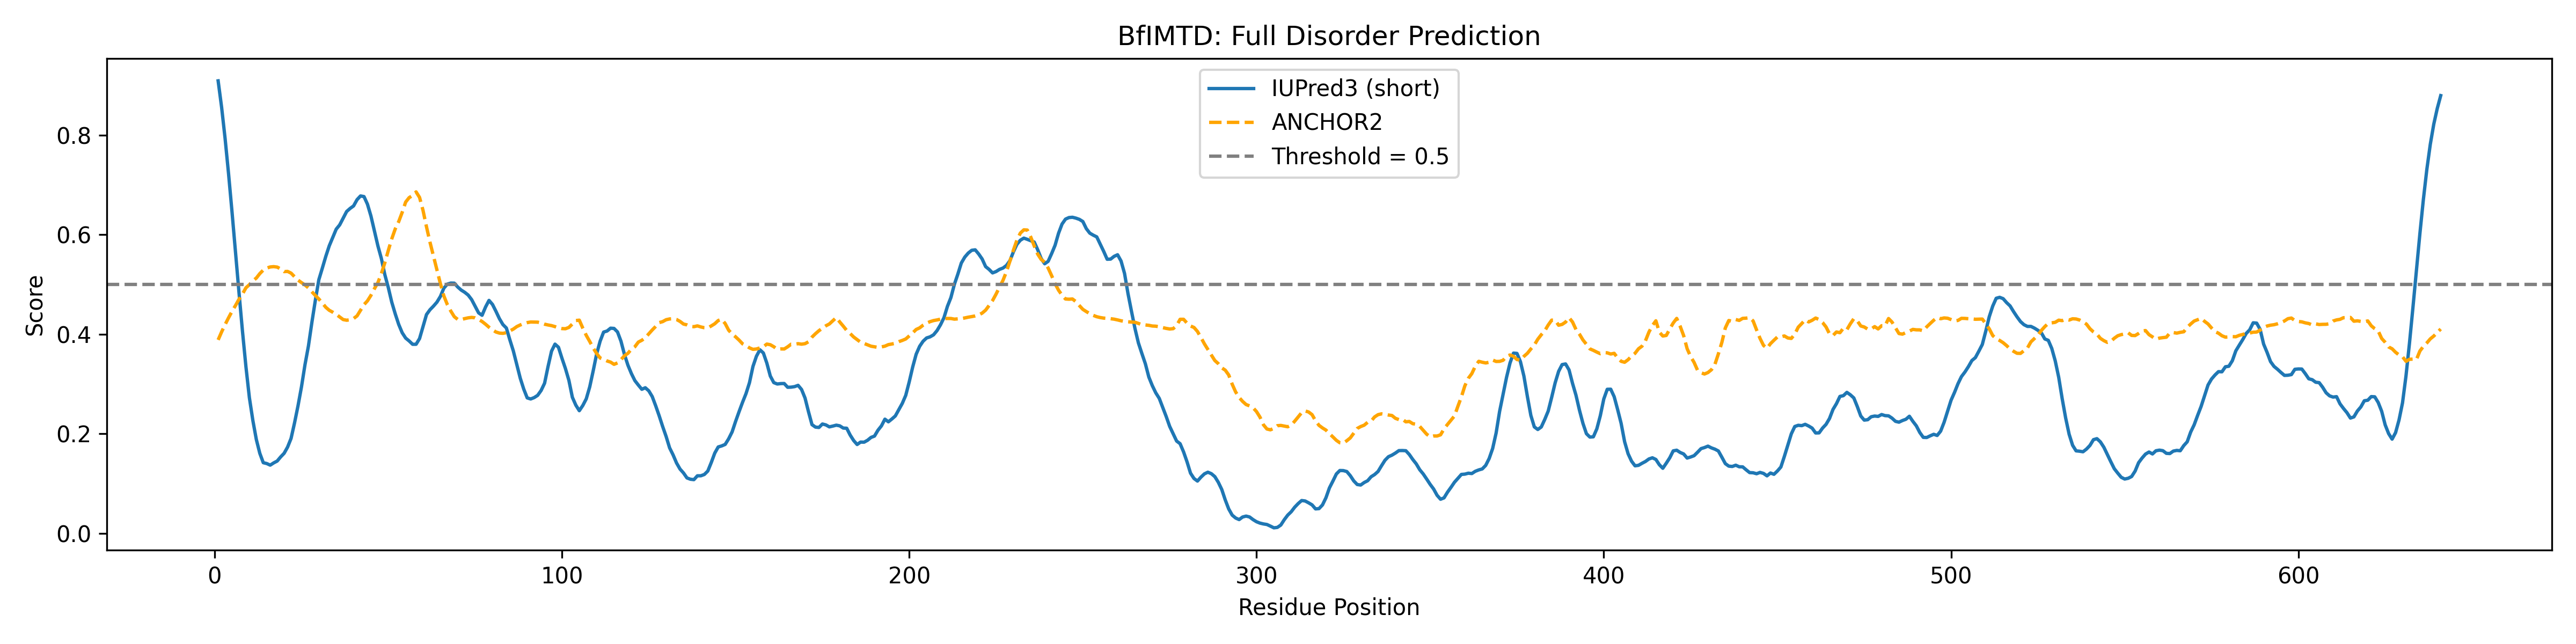

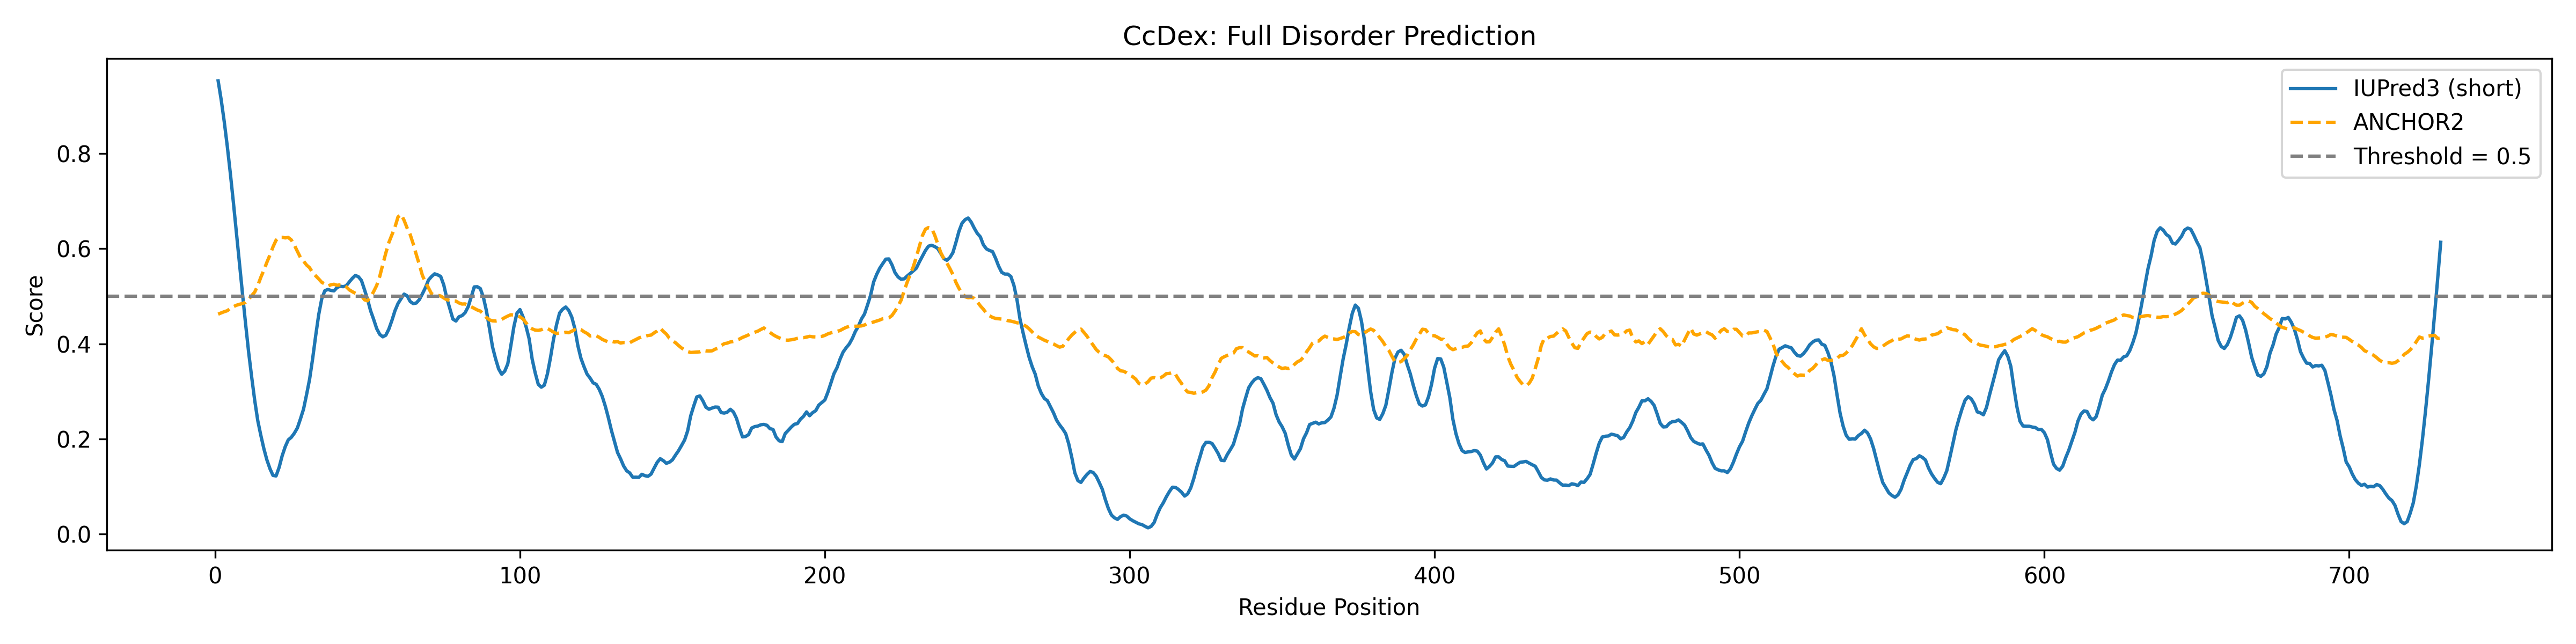

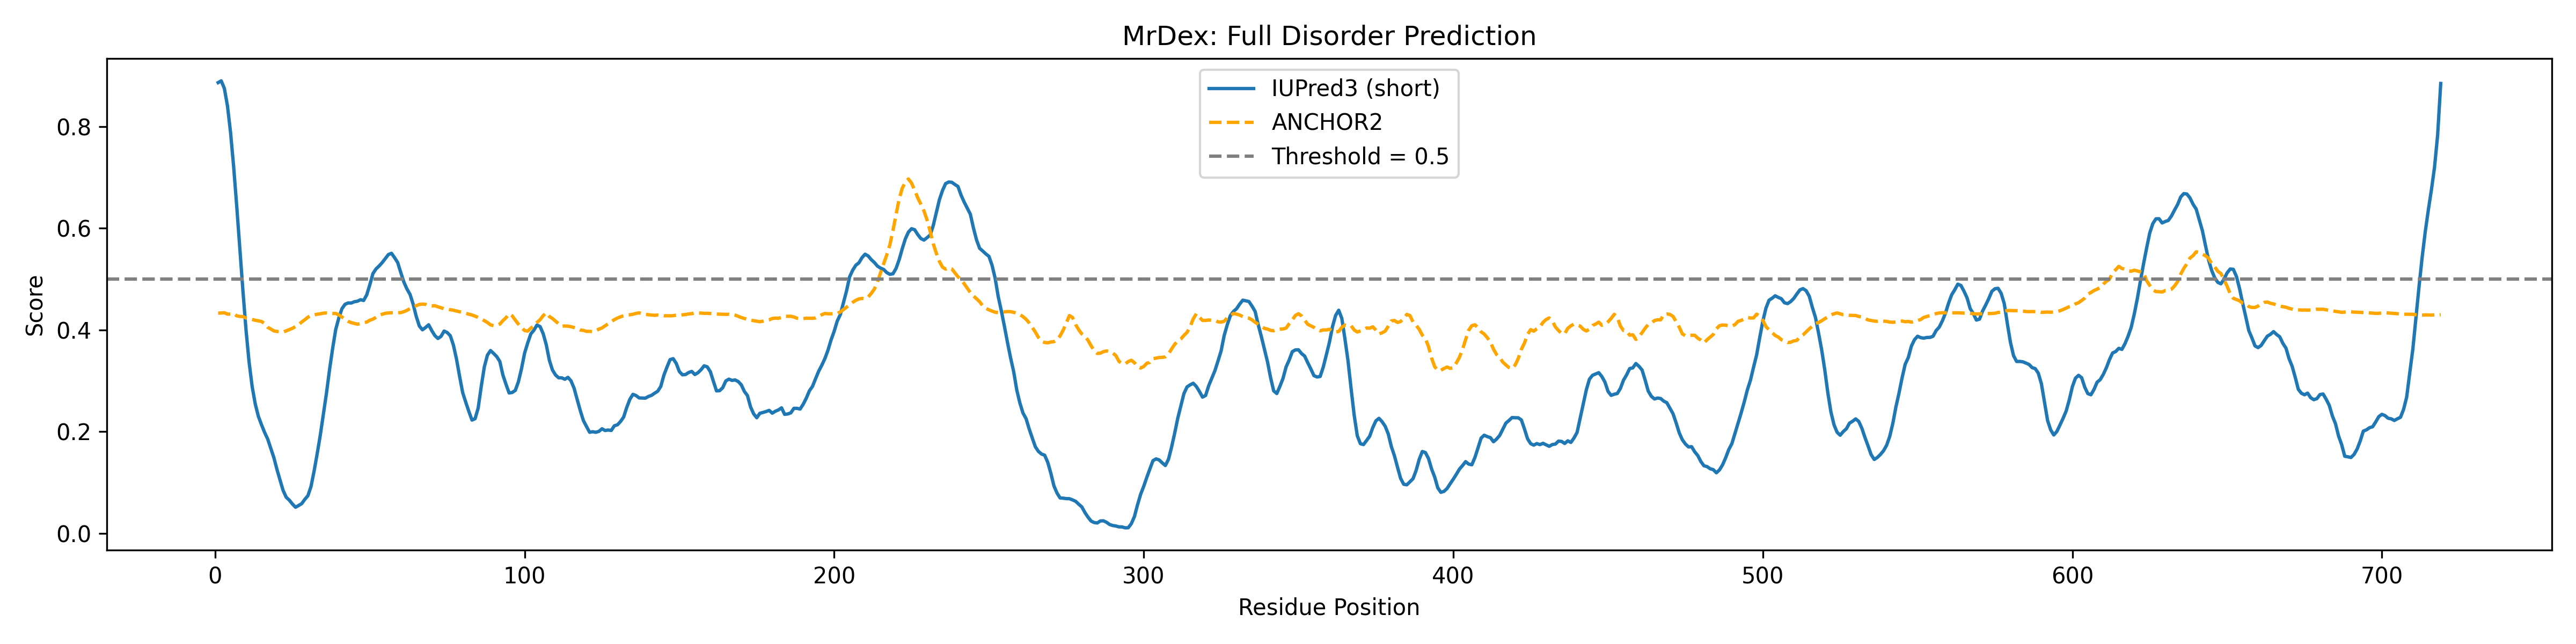

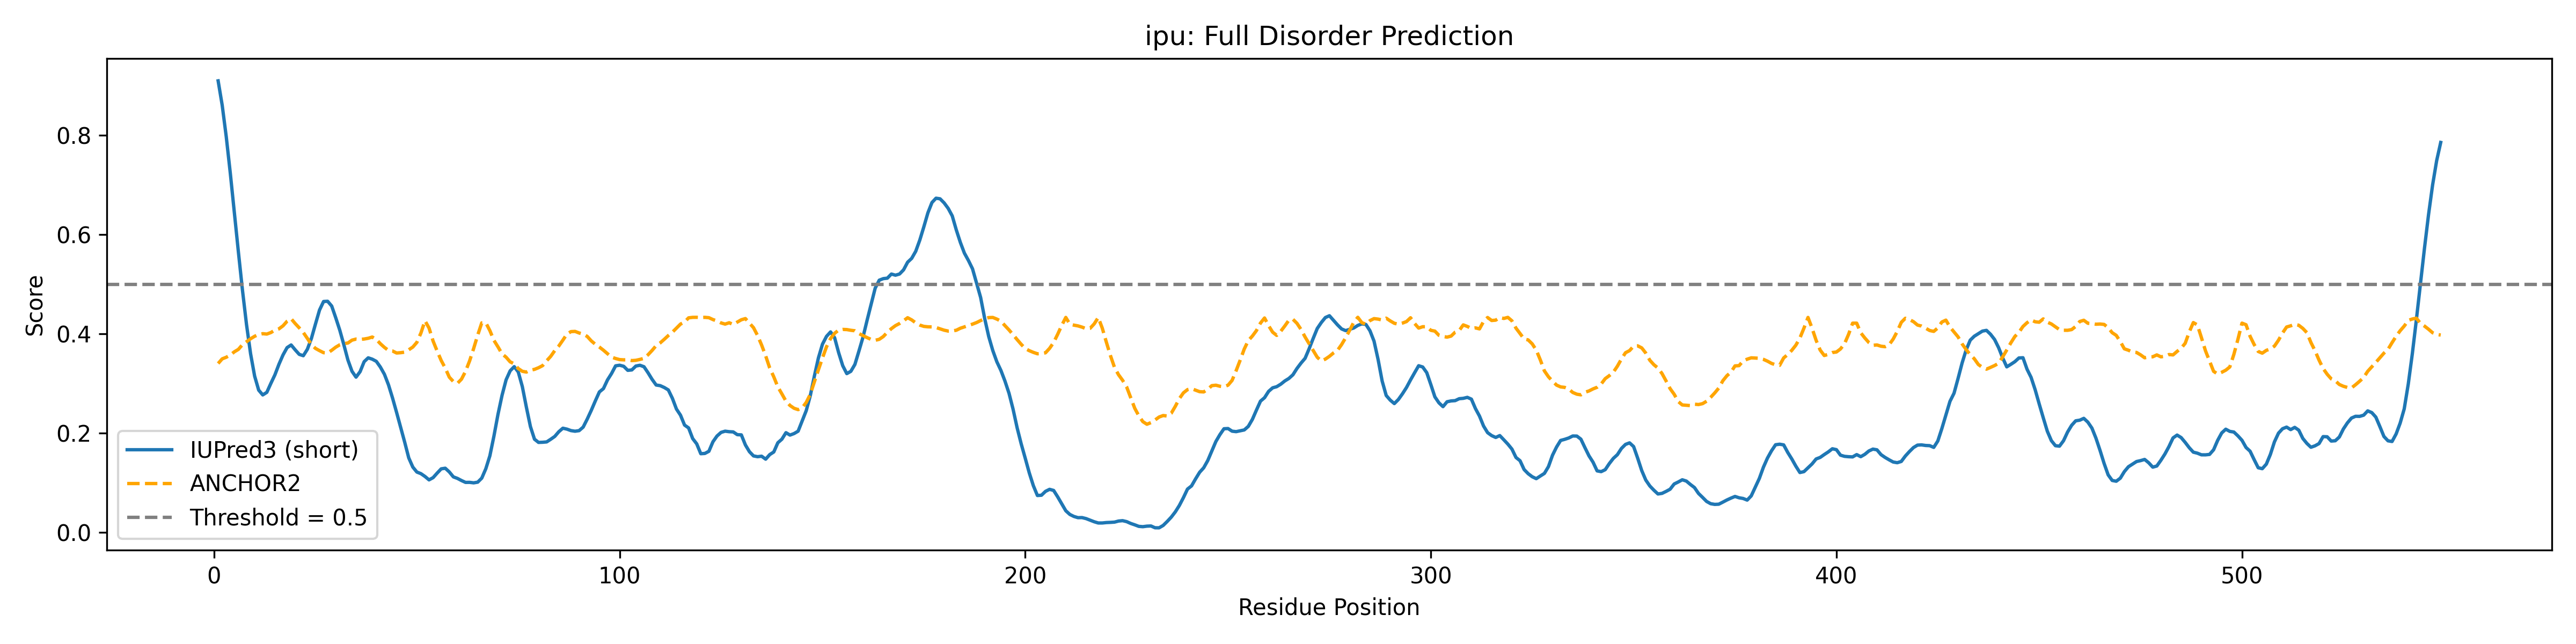

In [5]:
from IPython.display import Image, display
display(Image(filename="../results/IUPred3/BfIMTD_full_plot.png", width=800))
display(Image(filename="../results/IUPred3/CcDex_full_plot.png", width=800))
display(Image(filename="../results/IUPred3/MrDex_full_plot.png", width=800))
display(Image(filename="../results/IUPred3/ipu_full_plot.png", width=800))

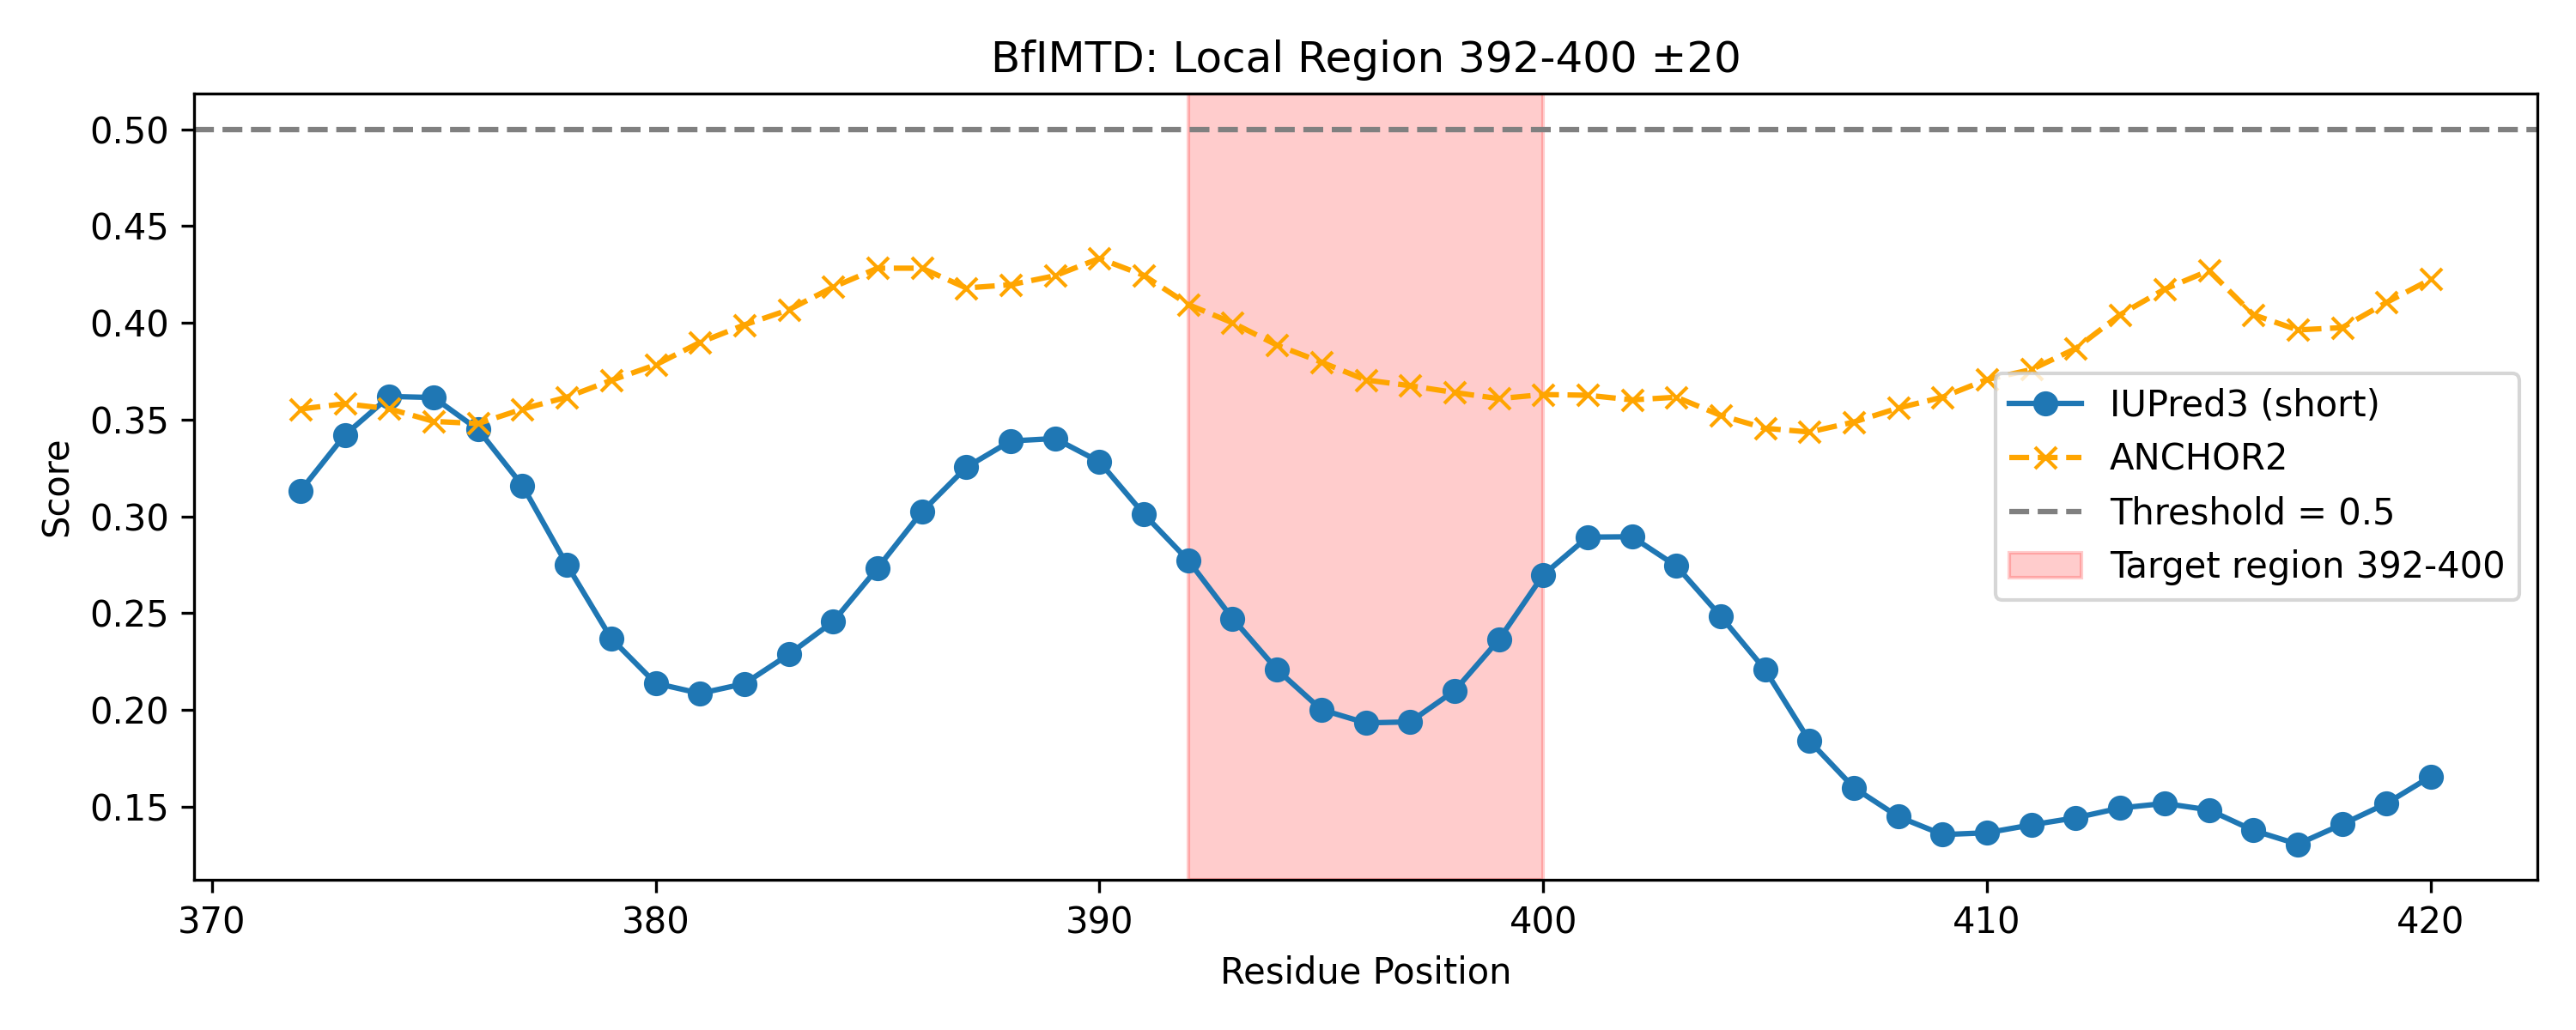

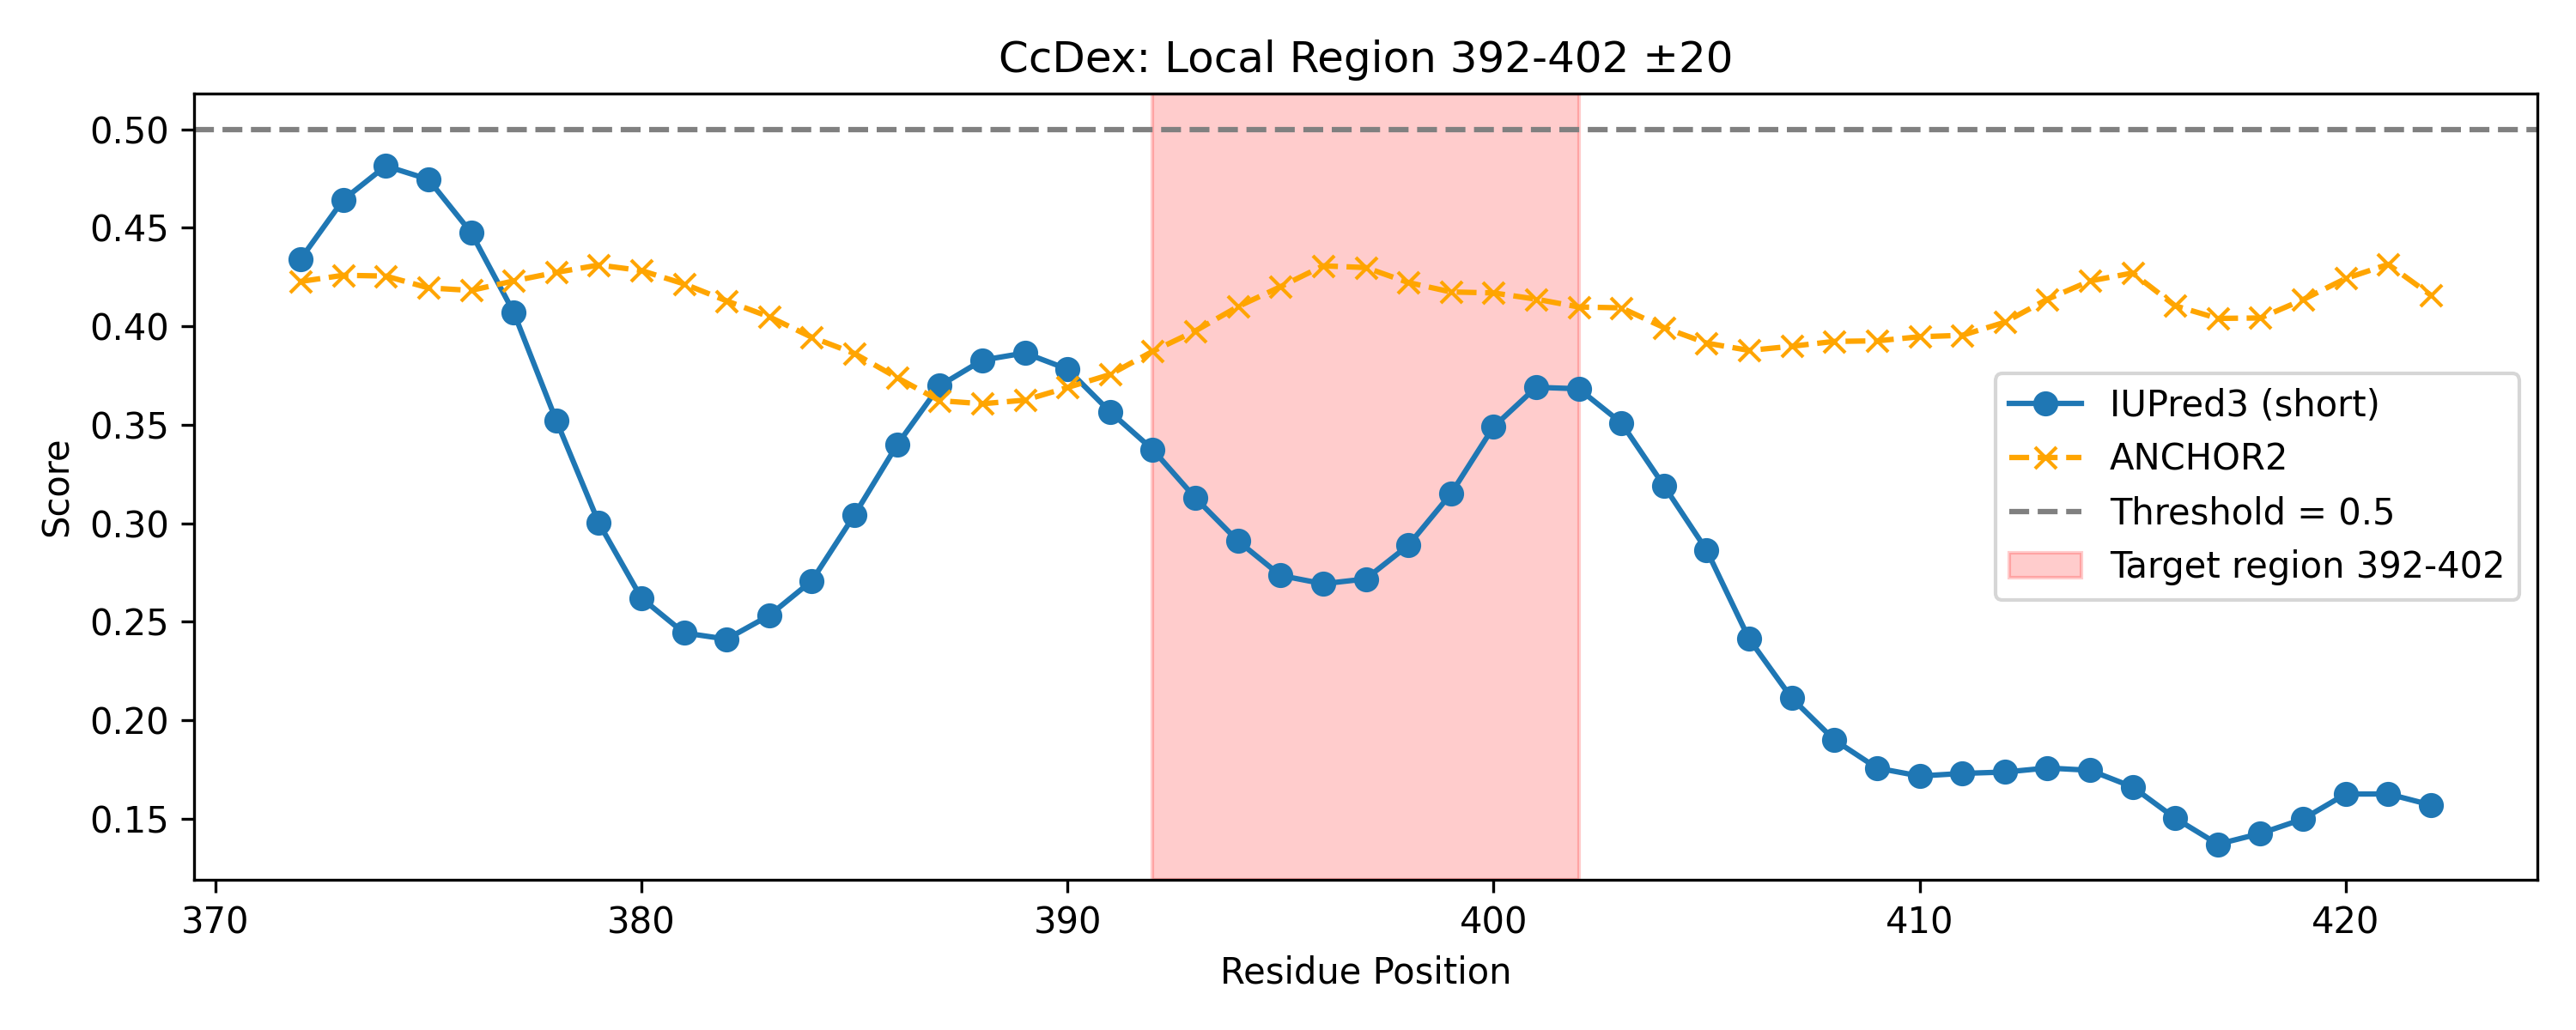

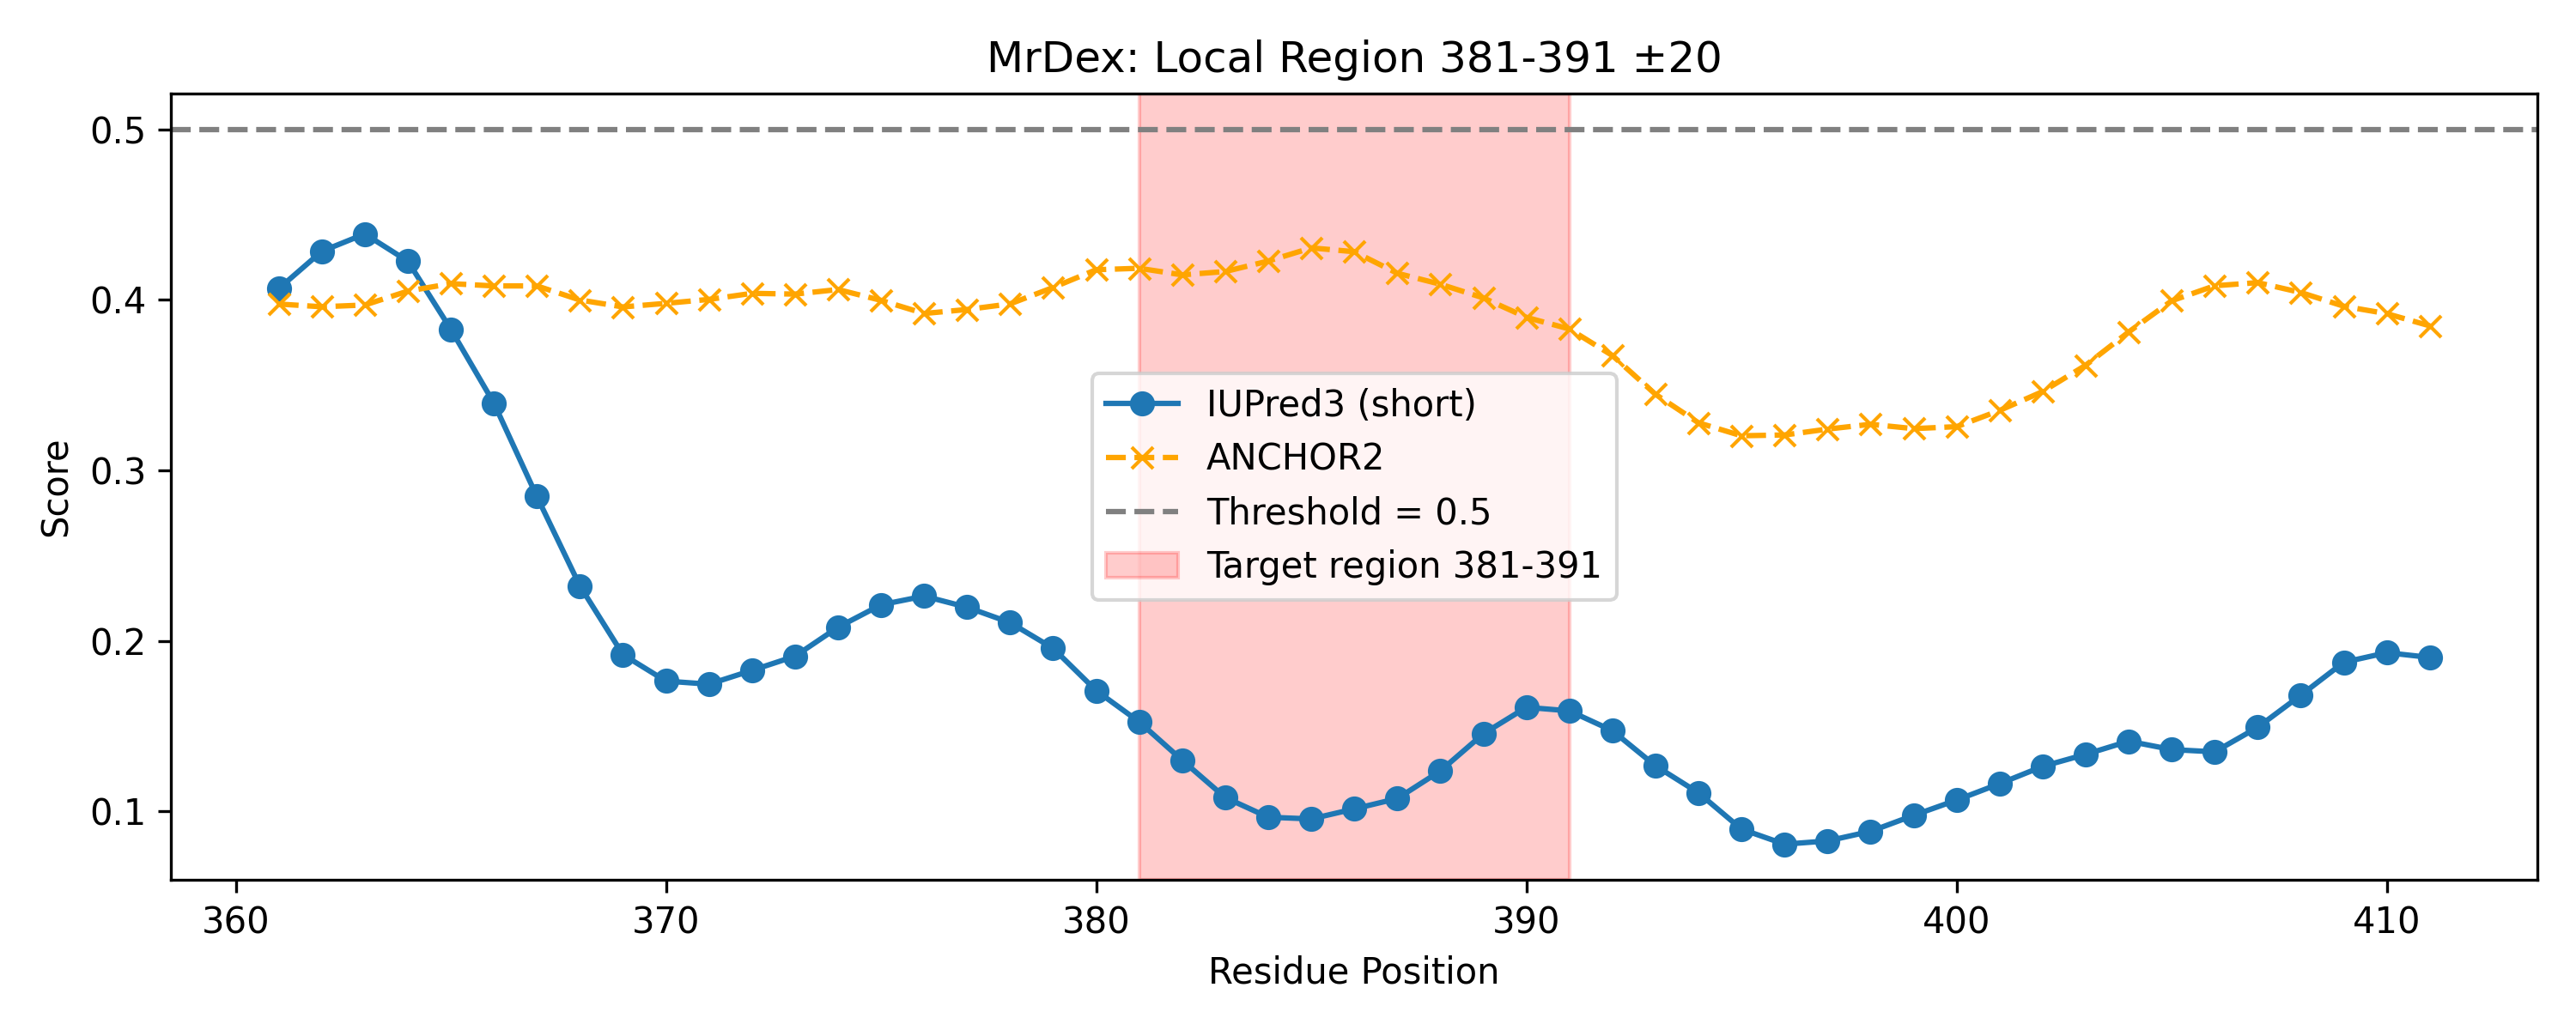

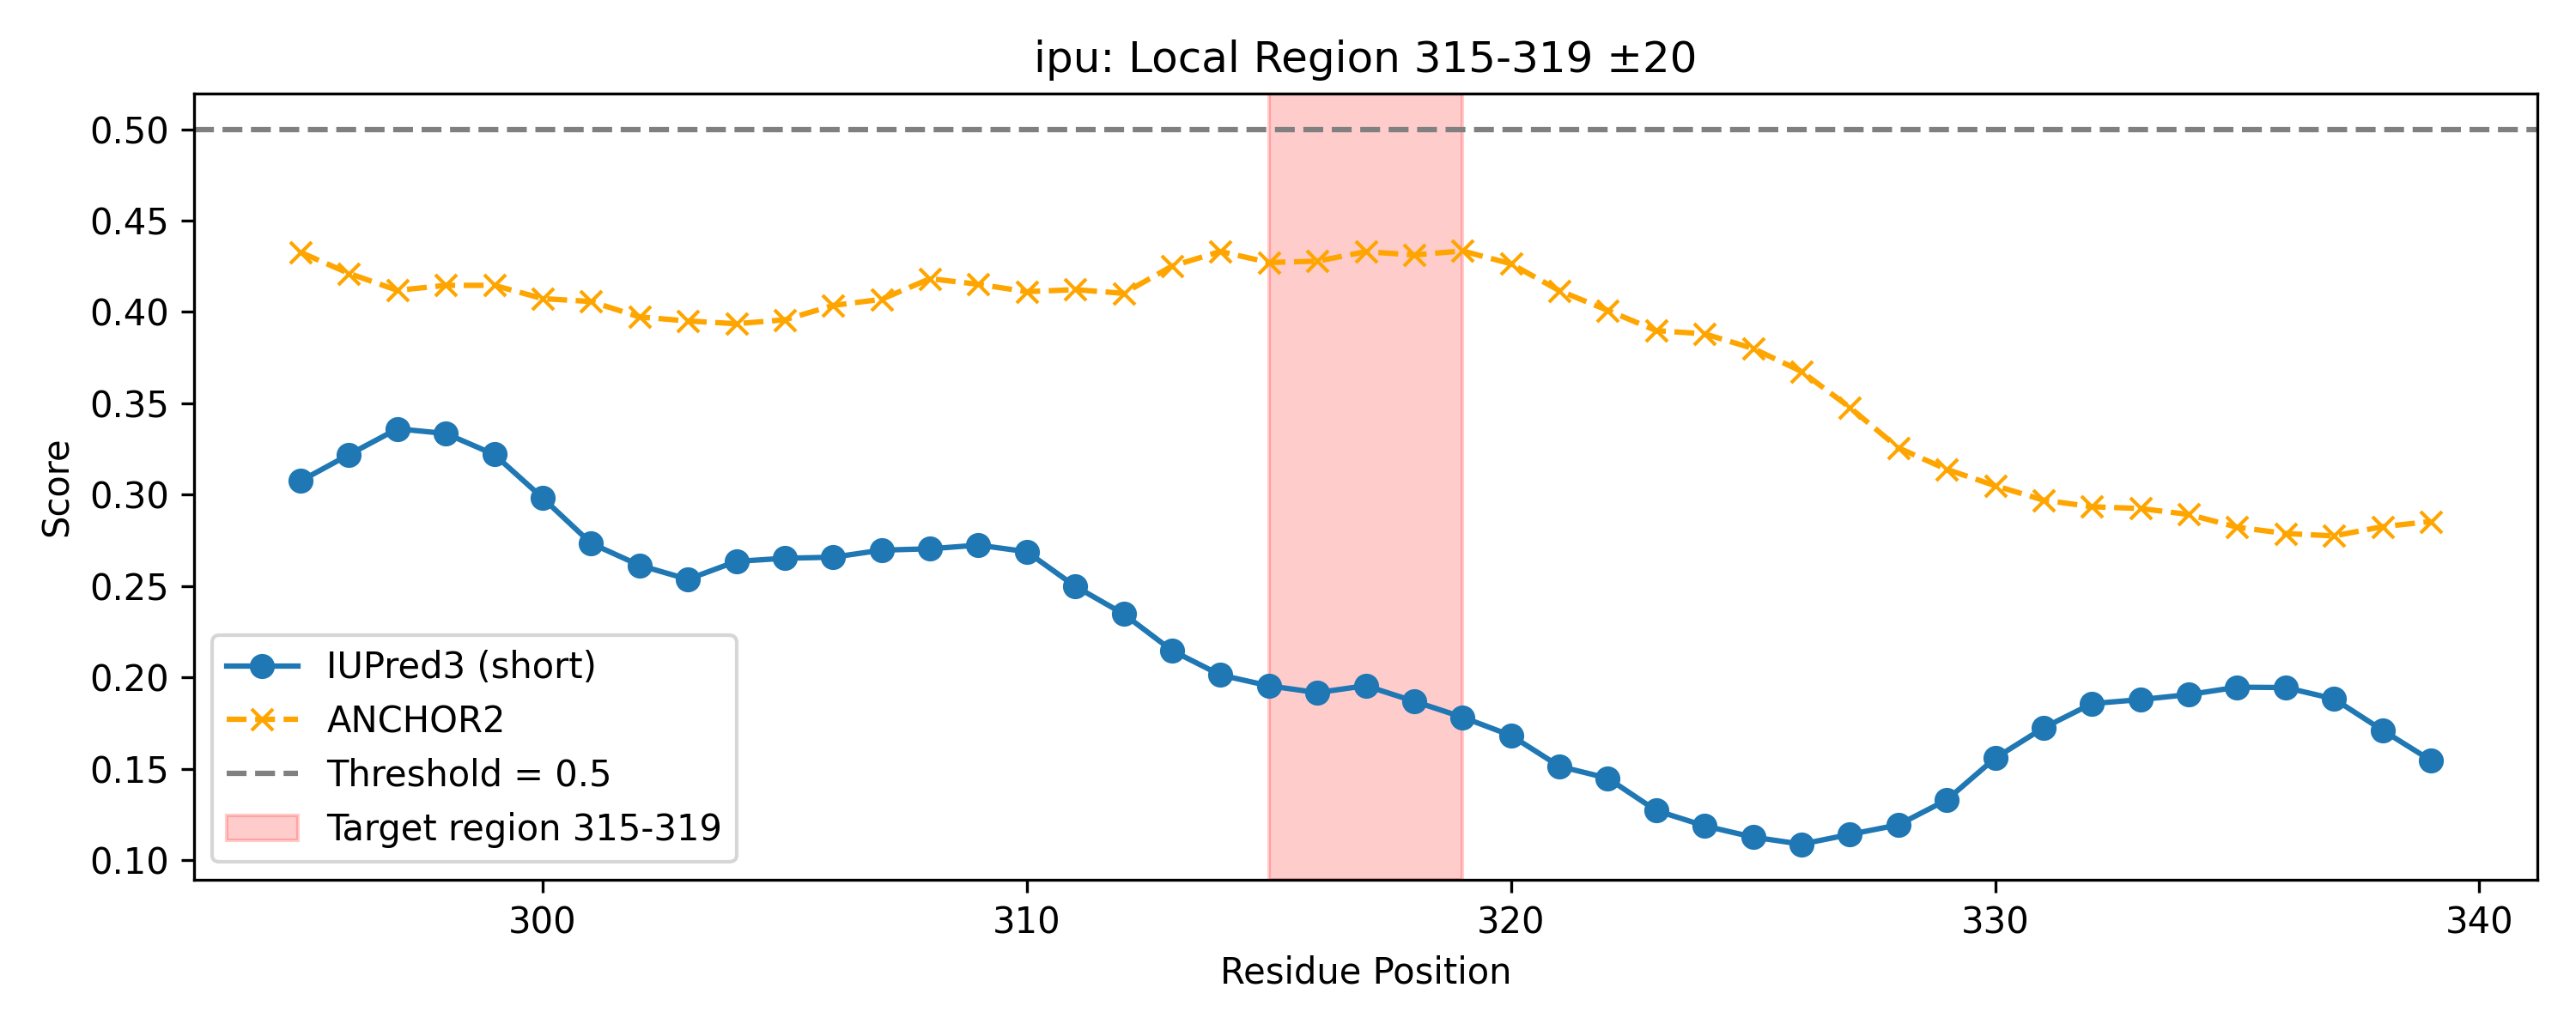

In [8]:
from IPython.display import Image, display
display(Image(filename="../results/IUPred3/BfIMTD_loop_392_400_plot.png", width=1000))
display(Image(filename="../results/IUPred3/CcDex_loop_392_402_plot.png", width=1000))
display(Image(filename="../results/IUPred3/MrDex_loop_381_391_plot.png", width=1000))
display(Image(filename="../results/IUPred3/ipu_loop_315_319_plot.png", width=1000))

### 4.3 Summary and Conclusions
1. The IUPred3 disorder predictions of all four dextranases (BfIMTD, CcDex, MrDex, and IPU (as a control group)) reveal a consistent trend of low disorder scores within the core regions, with higher disorder tendency appearing at N- and C-terminal tails. This indicates that the enzymes adopt stable and well-structured folds, while maintaining flexible termini, which is a common feature of many globular proteins.

2. The selected loop regions (BfIMTD 392–400(should be 402), CcDex 392–402, MrDex 381–391) all fall below the threshold of 0.5 in IUPred3, suggesting that **they are not intrinsically disordered**. However, the ANCHOR2 predictions show moderate scores (~0.40–0.45), revealing loop's **potential binding tendency** or **transient functional flexibility**.

3. CcDex shows slightly rising disorder scores, which may reflect increased flexibility or dynamic behavior of its loop. 

4. These observations support the hypothesis that the structurally ordered loop regions may serve as functionally dynamic regions involved in ligand adjustment, allosteric regulation, or interaction fine-tuning, which could be a pattern further validated by conservation and dynamic simulation results.

## Discussion

- These results further support my hypothesis that these loop regions, although ordered, contribute to the enzyme’s dynamic function through structurally encoded flexibility, which is a great insight that aligns well with the prior structural comparison and conservation analysis.

#### Refence:
1. Mizuno M, Koide A, Yamamura A, Akeboshi H, Yoshida H, Kamitori S, Sakano Y, Nishikawa A, Tonozuka T. Crystal structure of Aspergillus niger isopullulanase, a member of glycoside hydrolase family 49. J Mol Biol. 2008 Feb 8;376(1):210-20. doi: 10.1016/j.jmb.2007.11.098. Epub 2007 Dec 5. PMID: 18155243.